## Module 1 Project Work 

For this I will be using the OSEMiN Method:

**Step 1** *Obtain* -  this step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem.

Goal is to utilize the independent variables given to build a linear model to predict housing prices in Kings County

**Step 2** *Scrub* - In order to scrub the data, we'll first need to import it and understand exactly what it is we have to work with.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
kings_df = pd.read_csv('kc_house_data.csv')

In [5]:
kings_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
kings_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From here we can see a few things that we'll want to invesitage right away
1. What does each column mean?
2. Are there NaNs located in the data?
3. Is there data encoded to the wrong data type?
4. Do we need to subsample or is the data limited enough that it becomes unnecessary?

**We'll go ahead and take a look at each column definition first so that we can better understand what we're looking at.  To do this, we'll go to the Kaggle database for this information.**

* **id** - Identifier for each house
* **date** - Date each house was sold
* **price**- This our dependent variable and what we'll be predicting
* **bedrooms** - Number of bedrooms 
* **bathrooms**- Number of bathrooms 
* **sqft_living** - Square footage 
* **sqft_lot**- Square footage of the lot (or the land the house is on)
* **floors** - Total floors in house
* **waterfront** - This indicates a house that has a view of the water
* **view** - This indiciates whether or not the house has been viewed
* **condition** - How good the overall condition of the house is in
* **grade** - This seems to be a grade that is assigned based on the county's grading system.
* **sqft_above** - Square footage of house, not including the basement level
* **sqft_basement** - Square footage of the basement
* **yr_built** - Year the house was built
* **yr_renovated**- Most recent year the house was renovated
* **zipcode** - Zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - Living room area in 2015 - this would mean that the house has since been renovated
* **sqft_lot15** -  Lot size area in 2015 - again, this would mean that the lot has since been renovated (probably a direct corelation to the sqft_living15, but we'll need to do more investigating before we can confirm)

**Now we'll check for improperly encoded data types followed by NaNs.  The way to start this process is to to use .info() to understand the data types per column**

In [7]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Observations that we can make from here:
Date is an object - we'll want to change this to a date data type.
Sqft basement is currently a string instead of an int so we'll have to change that as well.
Grade and condition both seem to be categorical.  We'll have to look into these further.


To understand condition further since the .head() doesn't show everything I want to see, I'm going to take a look at the values in **condition** in order to see if they seem to be categorical.

In [8]:
kings_df['condition'].unique()

array([3, 5, 4, 1, 2])

It definitely seems based on the unique values above that condition is a categorical column that rates the condition of the home somewhere between 1 and 5. Now let's do the same for **grade** just to be sure.

In [9]:
kings_df['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

While there are definitely more options in grade, it does seem that these are categorical

Now that we know which columns contain our categorical data and which columns need to be converted, let's start with the conversions.

**Change Date to a date field**

In [10]:
kings_df['date']= pd.to_datetime(kings_df['date'])

Let's check and see if that worked

In [11]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11), object(1)
memory 

Great! Something to note is that considering we're looking at other more promenent factors than the date each house was sold, **we will most lilkey drop this column, but we can move along for now.**

Now we can move on to our next conversion and 

**Change sqft_basement to a number**

In [9]:
kings_df['sqft_basement'] = kings_df.['sqft_basement'].astype("float32")

SyntaxError: invalid syntax (<ipython-input-9-6549db98fda4>, line 1)

Based on the error above, it seems as though I need to invesitgate further the contents of sqft_basement before I can proceed.  Let's look at the unique values in this column to see what we have.

In [12]:
kings_df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

After looking at this further, I can see two things that are worth noting.  There are some that have 0.00, most likely indicating no basement, and, there are some columns filled with "?" which is most likely what is preventing me from doing the conversion that I am attempting to do here. Let's see how many of each of these there are.

In [13]:
 kings_df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
450.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
666.0         1
207.0         1
2310.0        1
784.0         1
506.0         1
2120.0        1
374.0         1
4130.0        1
602.0         1
1990.0        1
1245.0        1
1284.0        1
906.0         1
176.0         1
3480.0        1
4820.0        1
935.0         1
556.0         1
3260.0        1
2300.0        1
2490.0        1
508.0         1
2400.0        1
862.0         1
65.0          1
2180.0        1
295.0         1
1548.0        1
2730.0        1
2360.0        1
Name: sqft_basement, Len

From this we can see that a majority of our homes do not have a basement. In fact, out of 21597 entries, 12826 do not have a basement, making this more than 50% of the houses that we are evaluating.  Based on this common data, it would be a safe assumption that the "?" more likely do not have basements, than do based on the data.  While we could delete them, it would make greater sense to change the "?"s to 0's rather than deleting them since 0 is too prominent to delete all entries that do not have basements and there is a greater than 50% chance that these questions marks fall into that no basement category.

In [12]:
kings_df['sqft_basement'] = kings_df['sqft_basement'].map(lambda x: '0' if x == '?' else x)

In [13]:
kings_df['sqft_basement'] = kings_df['sqft_basement'].astype('float')

In [14]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

**Next, we'll want to change categorical columns to strings instead of integers.**  

In [14]:
kings_df['condition'] = kings_df['condition'].astype('str')
kings_df['grade'] = kings_df['grade'].astype('str')

In [15]:
kings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null object
grade            21597 non-null object
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(9), object(2)
memor

Great! Now let's look for **NaN** values. The first step is to create truth table for missing values:

In [16]:
kings_df.isna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


That's a lot of columns and rows to look at.  It's better to look for how many missing values in each column:

In [17]:
kings_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are three columns to look at here: waterfront, view and yr_renovated.

Let's start with **waterfront**

We can start by checking for any outliers.

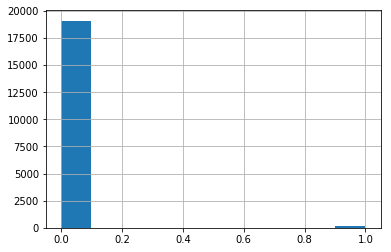

In [18]:
kings_df['waterfront'].hist()

It's clear based on this information that the majority of houses have 0 view of the water with one definite outlier.  Seems like we can fill Na's with 0.00 which is also the median as we can see below.

In [19]:
kings_df['waterfront'].median()

0.0

In [20]:
kings_df.waterfront.fillna(kings_df.waterfront.median(), inplace = True)

In [21]:
kings_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Next, let's look at whether or not the house has been viewed. Again, let's look for outliers.

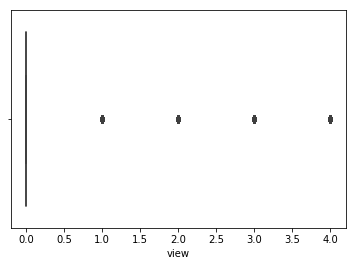

In [22]:
import seaborn as sns
sns.boxplot(x=kings_df['view'])

In this case, again the majority do not have a view, but there are multiple outliers. Before we proceed, I'd like to see how many of each value exist in 'view'

In [23]:
counts = kings_df['view'].value_counts().to_dict()
print(counts)

{0.0: 19422, 2.0: 957, 3.0: 508, 1.0: 330, 4.0: 317}


In this case, on the one hand, we could fill it with the median, OR given that view is insignificant in the grand scheme of the data, we could drop the column altogether. We'll fill with the median because we might end up wanting to see how much view has an inpact on our predictor value later on.

In [24]:
kings_df.view.fillna(kings_df.view.median(), inplace = True)

Let's make sure that this worked

In [25]:
kings_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Great! Now on to **yr_renovated**!

In [26]:
counts2 = kings_df['yr_renovated'].value_counts()
print(counts2)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In this case, it most likely would make sense to bin since there are so many different values and they cover an array of counts.  Let's also view this as a histogram just to get a better idea.

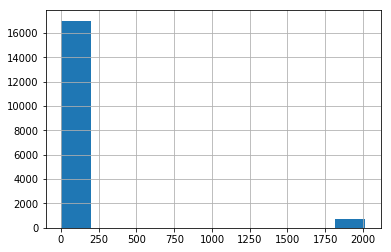

In [27]:
kings_df['yr_renovated'].hist()

In [29]:
counts3 = kings_df['yr_renovated'].value_counts().to_dict()
counts3

{0.0: 17011,
 2014.0: 73,
 2003.0: 31,
 2013.0: 31,
 2007.0: 30,
 2000.0: 29,
 2005.0: 29,
 1990.0: 22,
 2004.0: 22,
 2009.0: 21,
 1989.0: 20,
 2006.0: 20,
 2002.0: 17,
 1991.0: 16,
 1998.0: 16,
 1984.0: 16,
 1999.0: 15,
 2008.0: 15,
 2010.0: 15,
 2001.0: 15,
 1983.0: 15,
 2015.0: 14,
 1985.0: 14,
 1986.0: 14,
 1987.0: 14,
 1994.0: 14,
 1992.0: 13,
 1993.0: 12,
 1997.0: 12,
 1995.0: 12,
 1996.0: 11,
 1988.0: 11,
 1970.0: 9,
 2011.0: 9,
 1980.0: 8,
 1982.0: 8,
 2012.0: 8,
 1979.0: 7,
 1977.0: 7,
 1968.0: 7,
 1975.0: 5,
 1964.0: 5,
 1969.0: 4,
 1963.0: 4,
 1973.0: 4,
 1981.0: 4,
 1965.0: 4,
 1978.0: 3,
 1960.0: 3,
 1958.0: 3,
 1956.0: 3,
 1955.0: 3,
 1945.0: 3,
 1972.0: 3,
 1967.0: 2,
 1957.0: 2,
 1940.0: 2,
 1974.0: 2,
 1962.0: 2,
 1953.0: 1,
 1950.0: 1,
 1934.0: 1,
 1944.0: 1,
 1976.0: 1,
 1948.0: 1,
 1946.0: 1,
 1959.0: 1,
 1971.0: 1,
 1951.0: 1,
 1954.0: 1}

In [30]:
x = list(counts3.keys())
y = list(counts3.values())

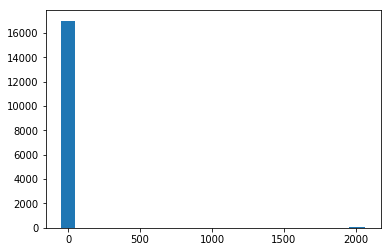

In [31]:
plt.bar(x, y, width=100)
plt.show()

There are so many more 0's than there are any other value that it makes sense to again, fill our NAs with 0's.  Should there have been a more diverse set of values that showed more prominence, we would have binned them, but in this case, updating to the median makes the most sense.

In [29]:
kings_df.yr_renovated.fillna(kings_df.yr_renovated.median(), inplace = True)

In [30]:
kings_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Great! Now our data seems clean!** Before we move forward, let's go ahead and drop the date column.  It seems that there are much greater predictors usable here to determine house price than sold date.

In [31]:
kings_df.drop(['date'], axis=1, inplace = True)

In [32]:
kings_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Now we can move to our next step in the OSEMiN Method.

**Step 3** *Explore Data*

Before we can go through the data and make predictions, we need to make sure that we thoroughly understand what we're working with.

Let's, again, look at the statistics of each column:

In [33]:
kings_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Now let's create histograms of each column so we can further visualize the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bef60b8>,
      dtype=object)

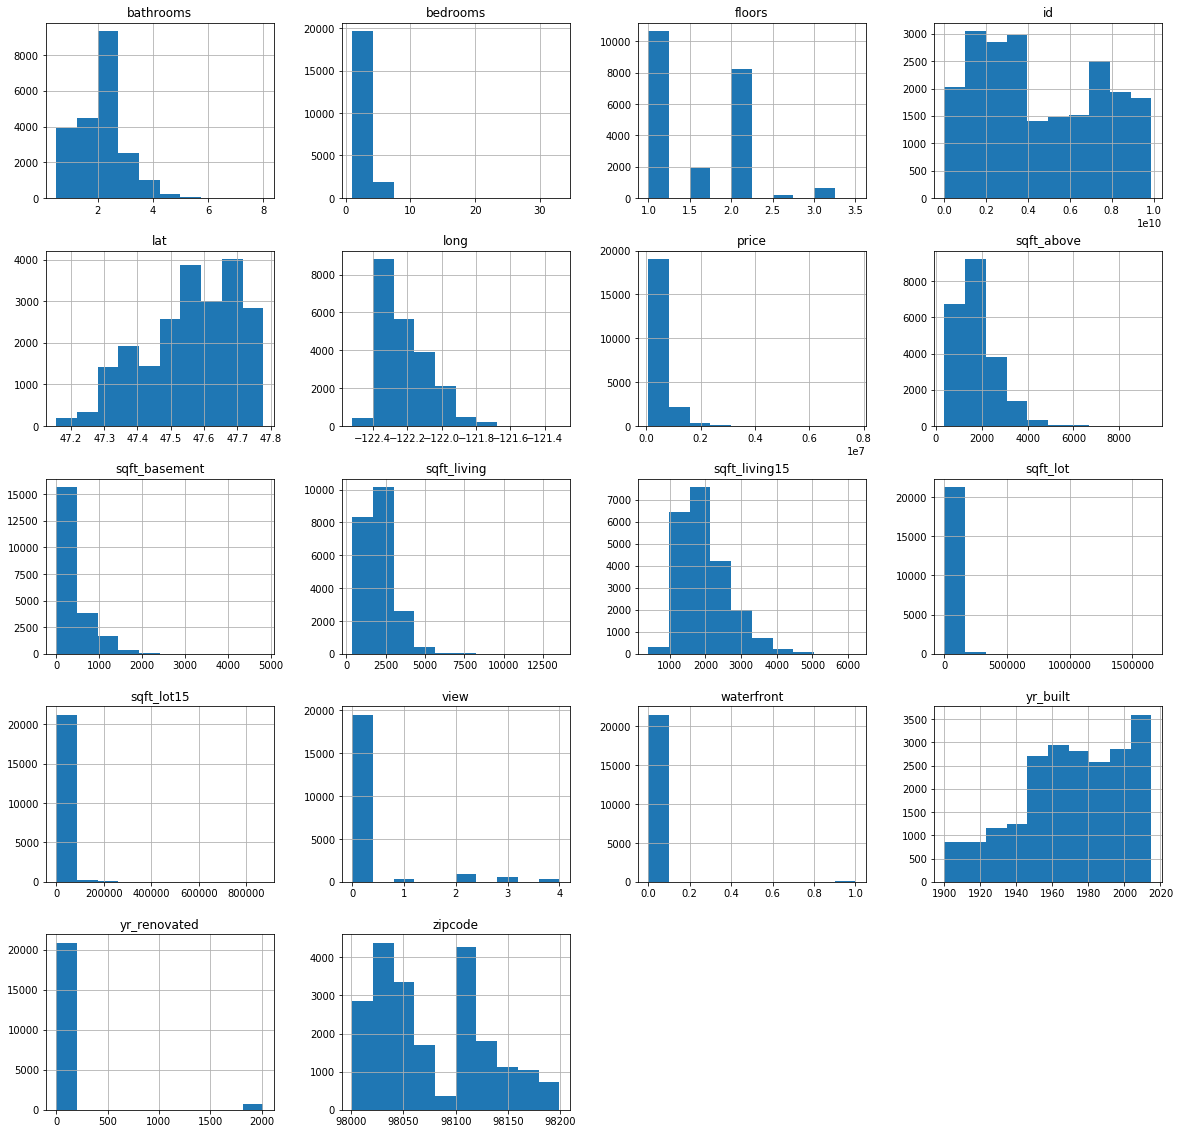

In [34]:
kings_df.hist(figsize=(20,20))

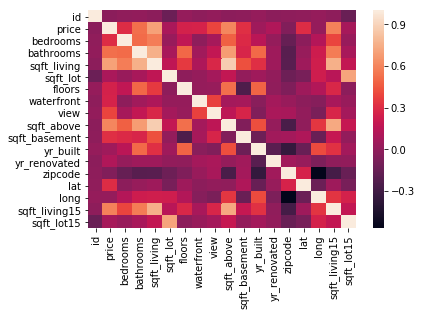

In [35]:
import seaborn as sns
sns.heatmap(kings_df.corr());

In [36]:
kings_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.605368,0.321108,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.071778,0.083050,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [37]:
abs(kings_df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False


*Based on the observations above, we can see that:*

* bathrooms and sqft_living are highly correlated
* sqft_living and sqft_above are highly correlated
* sqft_living and living15 are highly correlated

Let's drop these columns

In [38]:
kings_df.drop(['bathrooms', 'sqft_living', 'sqft_above', 'sqft_living15' ], axis=1)

,id,price,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15
0,7129300520,221900.0,3,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,5650
1,6414100192,538000.0,3,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,7639
2,5631500400,180000.0,2,10000,1.0,0.0,0.0,3,6,0.0,1933,0.0,98028,47.7379,-122.233,8062
3,2487200875,604000.0,4,5000,1.0,0.0,0.0,5,7,910.0,1965,0.0,98136,47.5208,-122.393,5000
4,1954400510,510000.0,3,8080,1.0,0.0,0.0,3,8,0.0,1987,0.0,98074,47.6168,-122.045,7503
5,7237550310,1230000.0,4,101930,1.0,0.0,0.0,3,11,1530.0,2001,0.0,98053,47.6561,-122.005,101930
6,1321400060,257500.0,3,6819,2.0,0.0,0.0,3,7,0.0,1995,0.0,98003,47.3097,-122.327,6819
7,2008000270,291850.0,3,9711,1.0,0.0,0.0,3,7,0.0,1963,0.0,98198,47.4095,-122.315,9711
8,2414600126,229500.0,3,7470,1.0,0.0,0.0,3,7,730.0,1960,0.0,98146,47.5123,-122.337,8113
9,3793500160,323000.0,3,6560,2.0,0.0,0.0,3,7,0.0,2003,0.0,98038,47.3684,-122.031,7570


Great! 

Now we can go back to the histograms that we created:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dbb9978>,
      dtype=object)

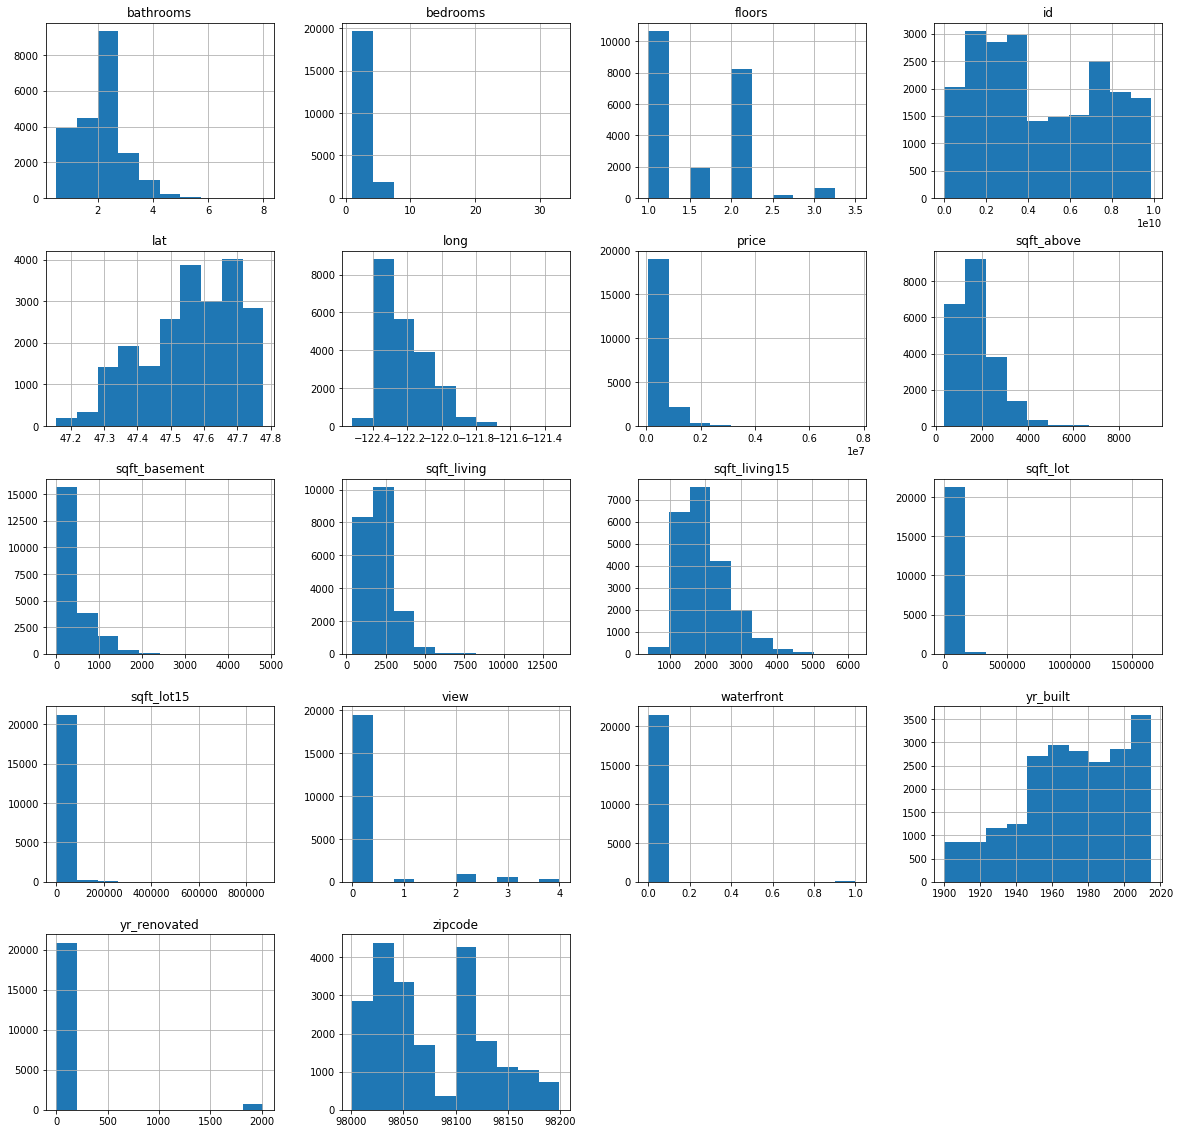

In [39]:
kings_df.hist(figsize=(20,20))

We can immediately see that none of these are normally distributed and so from here, we should start log transforming and scaling and normalizing the data.

First try log transforming the data:

/Users/blair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


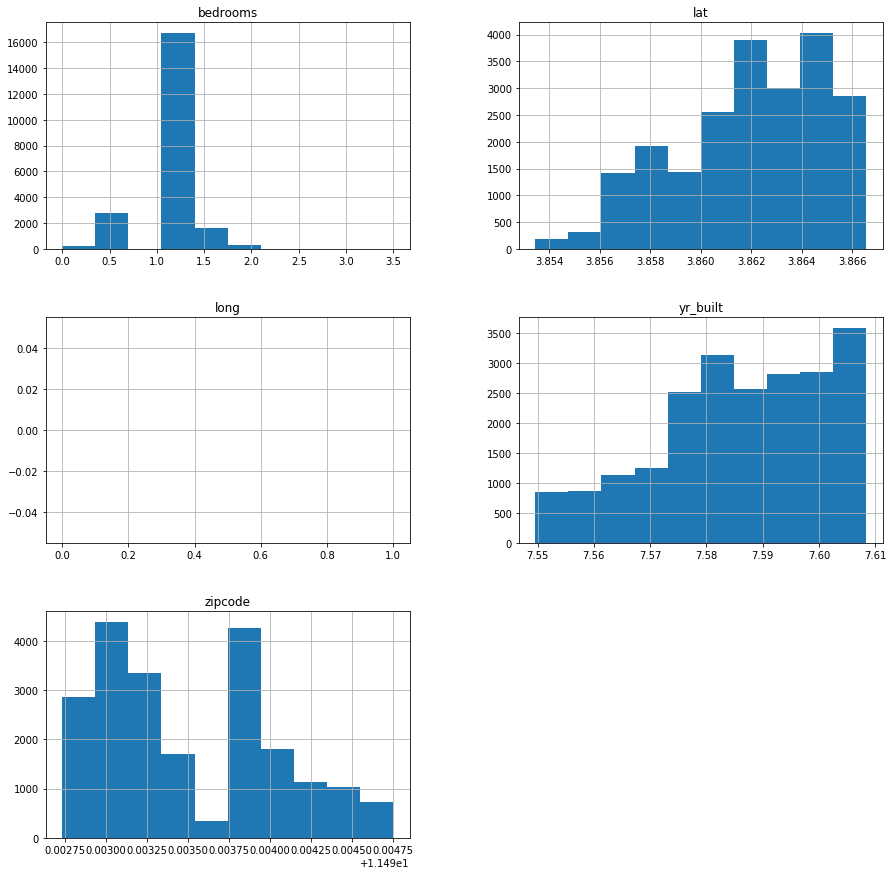

In [40]:
import numpy as np
data_log = pd.DataFrame([])
data_log["bedrooms"] = np.log(kings_df["bedrooms"])
data_log["lat"] = np.log(kings_df["lat"])
data_log["long"] = np.log(kings_df["long"])
data_log["yr_built"] = np.log(kings_df["yr_built"])
data_log["zipcode"] = np.log(kings_df["zipcode"])
data_log.hist(figsize  = [15,15]);

That didn't work - let's see what else we can do

First we'll start with **latitude coordinates**

In [41]:
lat = kings_df['lat']
scaled_lat = (lat-min(lat))/(max(lat)-min(lat))	

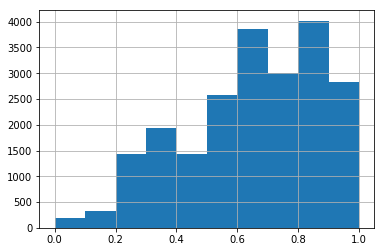

In [42]:
scaled_lat.hist()

It's definitely better.

Now let's work on **year built**

In [43]:
yrbuilt = kings_df['yr_built']
yr_built_disp = (yrbuilt-np.mean(yrbuilt))/np.sqrt(np.var(yrbuilt))

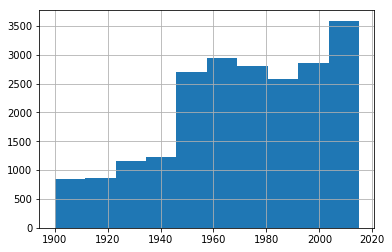

In [44]:
yrbuilt.hist()

Again, Much Better!

Now, let's go to **zipcode**

In [17]:
zipc = kings_df['zipcode']
zipc_disp = (zipc-np.mean(zipc))/np.sqrt(np.var(zipc))
zipc = zipc_disp

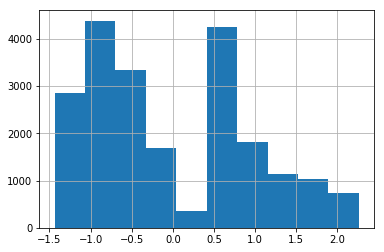

In [18]:
zipc_disp.hist()

Now let's see how each set of data relates to our predictor to see if there are any additional columns that we should be dropping.

In [69]:
kings_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1.869645,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,0.879210,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,-0.933473,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1.084772,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,-0.073850,47.6168,-122.045,1800,7503


In [78]:
kings_df_scaled = pd.DataFrame([])
kings_df_scaled["yr_built"]= yr_built_disp
kings_df_scaled["zipcode"]= zipc_disp
kings_df_scaled["lat"] = scaled_lat

In [79]:
kings_df_scaled.head()

,yr_built,zipcode,lat
0,-0.544678,1.869645,0.571498
1,-0.680850,0.879210,0.908959
2,-1.293626,-0.933473,0.936143
3,-0.204247,1.084772,0.586939
4,0.544700,-0.073850,0.741354


Let's look at relationships to see which features drive price the most.

**bedrooms**

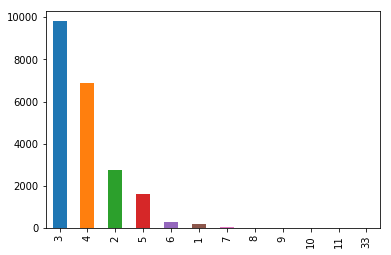

In [52]:
kings_df['bedrooms'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Price')

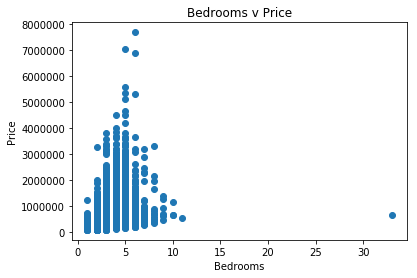

In [60]:
kings_df = kings_df.sort_values('bedrooms')
x = kings_df['bedrooms'] 
y = kings_df['price']
plt.scatter(x,y)
plt.title('Bedrooms v Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

**floors**

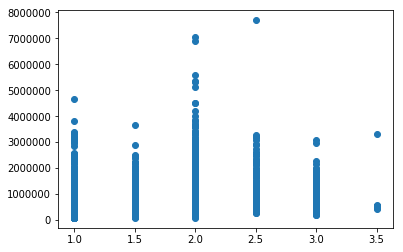

In [23]:
kings_df = kings_df.sort_values('floors')

x = kings_df['floors']
y = kings_df['price']
plt.show()

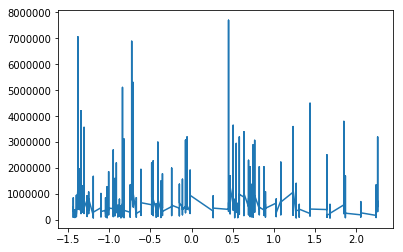

In [19]:
kings_df = kings_df.sort_values('zipcode')
x = zipc_disp
y = kings_df['price']
plt.plot(x,y)

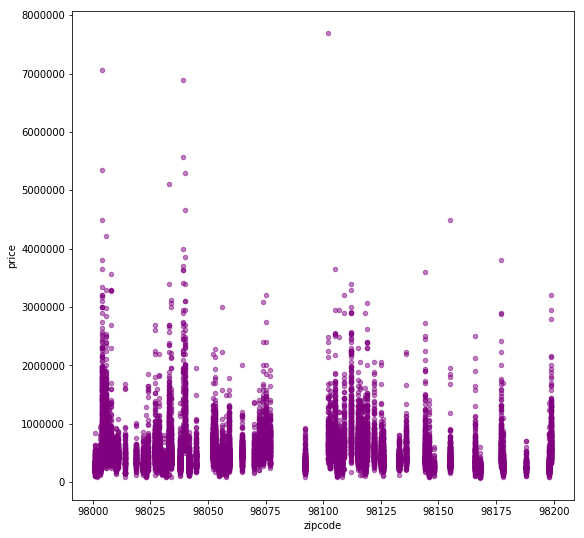

In [47]:
kings_df.plot(kind="scatter", x="zipcode", y="price", alpha=0.5, figsize = [9,9], color = "purple")
plt.show()

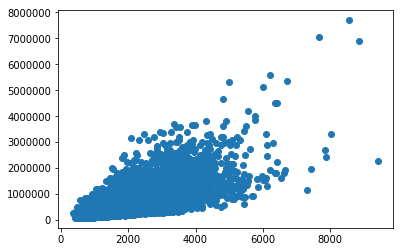

In [61]:
kings_df = kings_df.sort_values('sqft_above')
x = kings_df['sqft_above']
y = kings_df['price']
plt.scatter(x,y)

shows high heterdasticity (review)